In [101]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [102]:
import os
os.chdir('C:/Users/Ankit Hiremath/Downloads')


In [103]:
dataset1 = pd.read_csv("general_data.csv")
dataset1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [104]:
dataset1['Attrition']

0        No
1       Yes
2        No
3        No
4        No
       ... 
4405     No
4406     No
4407     No
4408     No
4409     No
Name: Attrition, Length: 4410, dtype: object

In [105]:
dataset1.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [106]:
dataset1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [107]:

dataset1.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
encode = LabelEncoder()
encode.fit(dataset1["Attrition"])
print(list(encode.classes_))
dataset1["Attrition"] = encode.transform(dataset1["Attrition"])

dataset1

[0, 1]


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,0,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [110]:
dataset1["JobRole"]

0       Healthcare Representative
1              Research Scientist
2                 Sales Executive
3                 Human Resources
4                 Sales Executive
                  ...            
4405           Research Scientist
4406        Laboratory Technician
4407              Sales Executive
4408        Laboratory Technician
4409        Laboratory Technician
Name: JobRole, Length: 4410, dtype: object

In [111]:
dataset1.head

<bound method NDFrame.head of       Age  Attrition     BusinessTravel              Department  \
0      51          0      Travel_Rarely                   Sales   
1      31          1  Travel_Frequently  Research & Development   
2      32          0  Travel_Frequently  Research & Development   
3      38          0         Non-Travel  Research & Development   
4      32          0      Travel_Rarely  Research & Development   
...   ...        ...                ...                     ...   
4405   42          0      Travel_Rarely  Research & Development   
4406   29          0      Travel_Rarely  Research & Development   
4407   25          0      Travel_Rarely  Research & Development   
4408   42          0      Travel_Rarely                   Sales   
4409   40          0      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1      

In [112]:
encode = LabelEncoder()
encode.fit(dataset1["BusinessTravel"])
print(list(encode.classes_))
dataset1["BusinessTravel"] = encode.transform(dataset1["BusinessTravel"])

encode = LabelEncoder()
encode.fit(dataset1["Department"])
print(list(encode.classes_))
dataset1["Department"] = encode.transform(dataset1["Department"])

encode = LabelEncoder()
encode.fit(dataset1["EducationField"])
print(list(encode.classes_))
dataset1["EducationField"] = encode.transform(dataset1["EducationField"])


encode = LabelEncoder()
encode.fit(dataset1["Gender"])
print(list(encode.classes_))
dataset1["Gender"] = encode.transform(dataset1["Gender"])


encode = LabelEncoder()
encode.fit(dataset1["Over18"])
print(list(encode.classes_))
dataset1["Over18"] = encode.transform(dataset1["Over18"])

encode = LabelEncoder()
encode.fit(dataset1["JobRole"])
print(list(encode.classes_))
dataset1["JobRole"] = encode.transform(dataset1["JobRole"])

encode = LabelEncoder()
encode.fit(dataset1["MaritalStatus"])
print(list(encode.classes_))
dataset1["MaritalStatus"] = encode.transform(dataset1["MaritalStatus"])
dataset1

['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
['Human Resources', 'Research & Development', 'Sales']
['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
['Female', 'Male']
['Y']
['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
['Divorced', 'Married', 'Single']


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,3.0,0,17,8,1,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,...,2.0,0,15,8,0,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,...,0.0,0,20,8,0,5.0,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,...,0.0,0,14,8,1,10.0,2,9,7,8


In [113]:
dataset1.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [114]:
dataset1.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EmployeeID                   int64
Gender                       int32
JobLevel                     int64
JobRole                      int32
MaritalStatus                int32
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                       int32
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [115]:
dataset1.skew()

Age                        0.413005
Attrition                  1.843111
BusinessTravel            -1.438026
Department                 0.172114
DistanceFromHome           0.957466
Education                 -0.289484
EducationField             0.549997
EmployeeCount              0.000000
EmployeeID                 0.000000
Gender                    -0.408387
JobLevel                   1.024703
JobRole                   -0.357027
MaritalStatus             -0.152071
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
Over18                     0.000000
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [88]:
dataset1.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,-0.010846,0.006963,-0.035706,0.043194,NaN,0.008649,-0.039352,...,0.299243,NaN,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.048206,-0.009730,-0.015111,-0.057940,NaN,-0.004729,0.018125,...,0.042345,NaN,0.032533,NaN,-0.006839,-0.170338,-0.049431,-0.134392,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.010982,0.024616,0.002755,-0.015462,NaN,-0.002590,-0.039243,...,0.022401,NaN,-0.031054,NaN,0.003683,0.033997,-0.041888,-0.014575,-0.032591,-0.022636
Department,-0.010846,-0.048206,-0.010982,1.000000,0.012134,-0.004597,0.013720,NaN,-0.003455,0.003158,...,-0.003954,NaN,-0.007840,NaN,0.010512,-0.019839,0.012866,0.010078,0.014845,0.018016
DistanceFromHome,0.006963,-0.009730,0.024616,0.012134,1.000000,-0.008638,-0.024665,NaN,-0.001097,-0.044173,...,-0.013843,NaN,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,0.002755,-0.004597,-0.008638,1.000000,0.012329,NaN,-0.009680,-0.016547,...,-0.016250,NaN,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EducationField,0.043194,-0.057940,-0.015462,0.013720,-0.024665,0.012329,1.000000,NaN,-0.000819,-0.005634,...,0.009023,NaN,-0.011214,NaN,0.021620,0.021593,-0.021793,0.023120,0.048181,0.021664
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.004729,-0.002590,-0.003455,-0.001097,-0.009680,-0.000819,NaN,1.000000,-0.013165,...,-0.001117,NaN,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
Gender,-0.039352,0.018125,-0.039243,0.003158,-0.044173,-0.016547,-0.005634,NaN,-0.013165,1.000000,...,-0.066924,NaN,0.011841,NaN,0.019237,-0.027598,-0.030167,-0.017277,-0.021812,0.004438


In [116]:
dataset1.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [117]:
dataset1.mean()

Age                           36.923810
Attrition                      0.161224
BusinessTravel                 1.607483
Department                     1.260544
DistanceFromHome               9.192517
Education                      2.912925
EducationField                 2.247619
EmployeeCount                  1.000000
EmployeeID                  2205.500000
Gender                         0.600000
JobLevel                       2.063946
JobRole                        4.458503
MaritalStatus                  1.097279
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
Over18                         0.000000
PercentSalaryHike             15.209524
StandardHours                  8.000000
StockOptionLevel               0.793878
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64

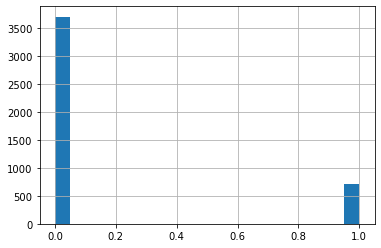

In [118]:
dataset1["Attrition"].hist(bins=20)


In [119]:
dataset1.mean

<bound method DataFrame.mean of       Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0      51          0               2           2                 6          2   
1      31          1               1           1                10          1   
2      32          0               1           1                17          4   
3      38          0               0           1                 2          5   
4      32          0               2           1                10          1   
...   ...        ...             ...         ...               ...        ...   
4405   42          0               2           1                 5          4   
4406   29          0               2           1                 2          4   
4407   25          0               2           1                25          2   
4408   42          0               2           2                18          2   
4409   40          0               2           1                28          3

In [120]:
dataset1.fillna(dataset1.mean())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.000000,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.000000,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.000000,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.000000,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.000000,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,3.0,0,17,8,1,10.000000,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,...,2.0,0,15,8,0,10.000000,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,...,0.0,0,20,8,0,5.000000,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,...,0.0,0,14,8,1,10.000000,2,9,7,8


In [121]:
dataset1.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [129]:
x=dataset1.drop("Attrition",axis=1)
y=dataset1["Attrition"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
dataset1.isna().sum()


(3505, 23)
(877, 23)
(3505,)
(877,)


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [130]:
lin_reg = LinearRegression()

#Train the Model


In [131]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [132]:
print(lin_reg.coef_) # value for each column

# Check Constant of our line (i.e c from y=mx+c)
print("\n",lin_reg.intercept_)

[-3.61257536e-03 -4.56179988e-03 -2.89294473e-02 -1.05420154e-03
 -5.82948673e-03 -9.41870536e-03  1.73472348e-18  3.02820311e-07
  1.83232827e-02 -2.93867746e-03  5.80670237e-03  7.54781737e-02
 -3.00317499e-07  1.47817180e-02 -1.90819582e-17  2.02687019e-03
 -8.67361738e-19 -8.20317454e-04 -4.92708002e-03 -1.71895657e-02
  1.59176853e-03  1.24454513e-02 -1.47223141e-02]

 0.34281340128101434


In [133]:
#Test the model
y_pred = lin_reg.predict(X_test)

In [134]:
from sklearn.metrics import r2_score,mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = r2_score(y_test , y_pred)

print(" RMSE :",RMSE)
print("\n R2 value",r2)

 RMSE : 0.3719614007762032

 R2 value 0.07241055638232152
